In [ ]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random

student_data = pd.read_csv("/content/courses.csv")
student_data = student_data.set_index('uid')
student_data.index.names = [None]
student_data.head()

,CC,ADV,CSD,CE,AIH,RMV,BCT,SMA,DL,CA,RS,CSS
2021300001,True,False,False,True,False,False,False,True,False,False,False,True
2021300002,True,False,False,True,False,False,False,False,False,True,False,True
2021300003,True,False,False,True,False,False,False,False,False,False,True,True
2021300004,False,False,True,True,False,False,False,True,False,False,False,True
2021300005,False,False,False,False,False,False,True,False,True,False,True,True


In [ ]:
courses = list(student_data.columns)[0:]

class_network = nx.Graph()
class_network.add_nodes_from(courses)

without_subj = student_data.copy()
without_subj = without_subj.T # transpose
without_subj.head()

,2021300001,2021300002,2021300003,2021300004,2021300005,2021300006,2021300007,2021300008,2021300009,2021300010,...,2022301007,2022301008,2022301009,2022301010,2022301011,2022301012,2022301013,2022301014,2022301015,2022301016
CC,True,True,True,False,False,False,False,False,False,True,...,True,False,False,True,False,True,False,False,False,True
ADV,False,False,False,False,False,False,False,False,False,True,...,False,True,False,False,True,False,False,False,False,True
CSD,False,False,False,True,False,False,True,False,False,False,...,False,False,True,False,False,False,False,True,False,False
CE,True,True,True,True,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
AIH,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False


In [ ]:
list_of_overlaps = []
name_list = without_subj.columns
for student in name_list:
  list_of_overlaps.append(list(without_subj.loc[without_subj[student]].index))

In [ ]:
list_of_overlaps[:1]

[['CC', 'CE', 'SMA', 'CSS']]

In [ ]:
import itertools

for sublist in list_of_overlaps:
   for pair in itertools.combinations(sublist, 2):
      class_network.add_edge(pair[0], pair[1])

In [ ]:
n_edges_total = len(list(class_network.edges))
print(n_edges_total)

66


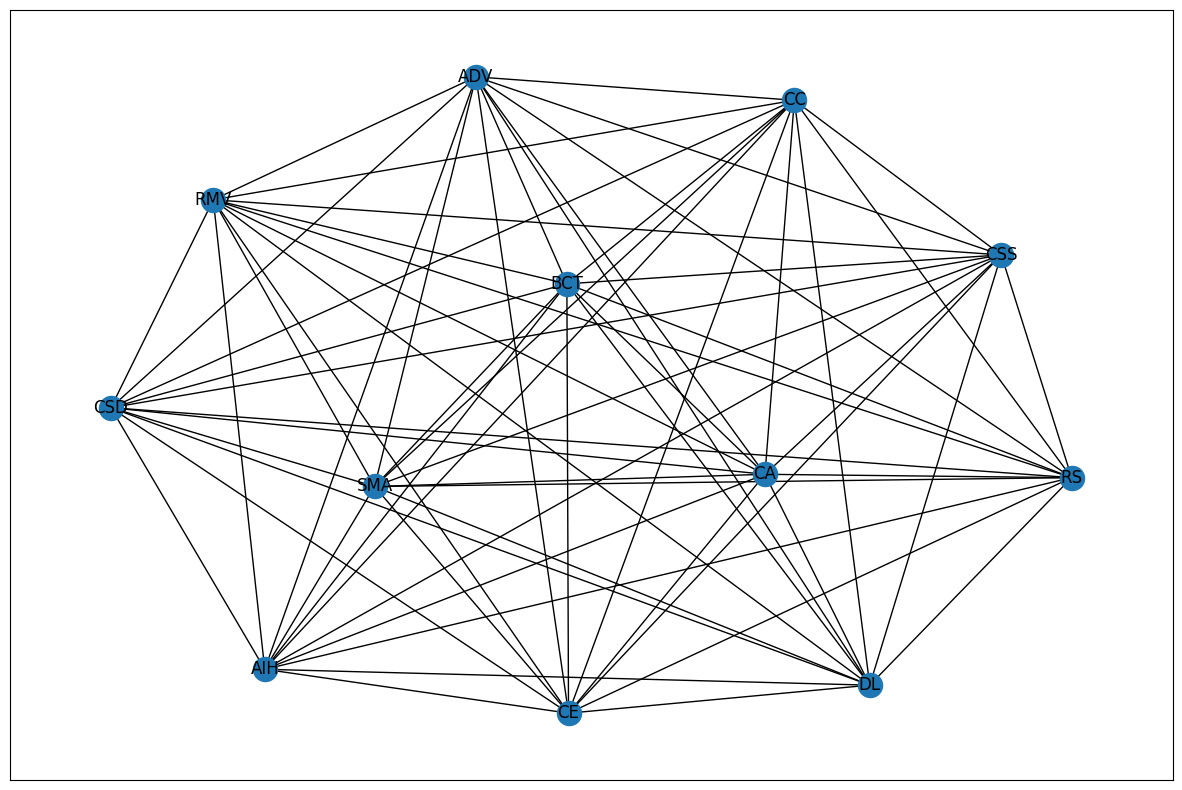

In [ ]:
fig = plt.figure(figsize=(15,10))
nx.draw_networkx(class_network, with_labels=True)
plt.savefig('foo.png')

In [ ]:
max(dict(class_network.degree).values())

11

In [ ]:
colors = ["lightcoral", "gray", "lightgray", "firebrick", "red", "chocolate", "darkorange", "moccasin", "gold",
          "yellow", "darkolivegreen", "chartreuse", "forestgreen", "lime", "mediumaquamarine", "turquoise", "teal",
          "cadetblue", "dogerblue", "blue", "slateblue", "blueviolet", "magenta", "lightsteelblue"]

In [ ]:
from datetime import datetime
dates = []
calendar = {}
for i in list(range(14,20)):
    for j in list(range(10,18,2)):
        date = datetime(2024, 5, i, j, 0)
        dates.append(date)
        calendar[date] = []

In [ ]:
from_color_to_date = {col: dates[i] for i, col in enumerate(colors)}
from_color_to_date['red']

datetime.datetime(2024, 5, 15, 10, 0)

In [ ]:
# dict(class_network['Robotics'])

In [ ]:
class_network.nodes

NodeView(('CC', 'ADV', 'CSD', 'CE', 'AIH', 'RMV', 'BCT', 'SMA', 'DL', 'CA', 'RS', 'CSS'))

In [ ]:
def greedy_coloring_algorithm(network, colors):
    nodes = list(network.nodes())
    random.shuffle(nodes) # step 1 random ordering
    for node in nodes:
        dict_neighbors = dict(network[node])
# gives names of nodes that are neighbors
        nodes_neighbors = list(dict_neighbors.keys())

        forbidden_colors = []
        for neighbor in nodes_neighbors:
            #example.nodes.data()[1]
            #len(example.nodes.data()[1].keys())
            if len(network.nodes.data()[neighbor].keys()) == 0:
                # if the neighbor has no color, proceed
                continue
            else:
                # if the neighbor has a color,
                # this color is forbidden
                #example.nodes.data()[1]['color']
                forbidden_color = network.nodes.data()[neighbor]
                forbidden_color = forbidden_color['color']
                forbidden_colors.append(forbidden_color)
        # assign the first color
        # that is not forbidden
        for color in colors:
            # step 2: start everytime at the top of the colors,
            # so that the smallest number of colors is used
            if color in forbidden_colors:
                continue
            else:
                # step 3: color one node at the time
                network.nodes[node]['color'] = color
                break

In [ ]:
greedy_coloring_algorithm(class_network, colors)


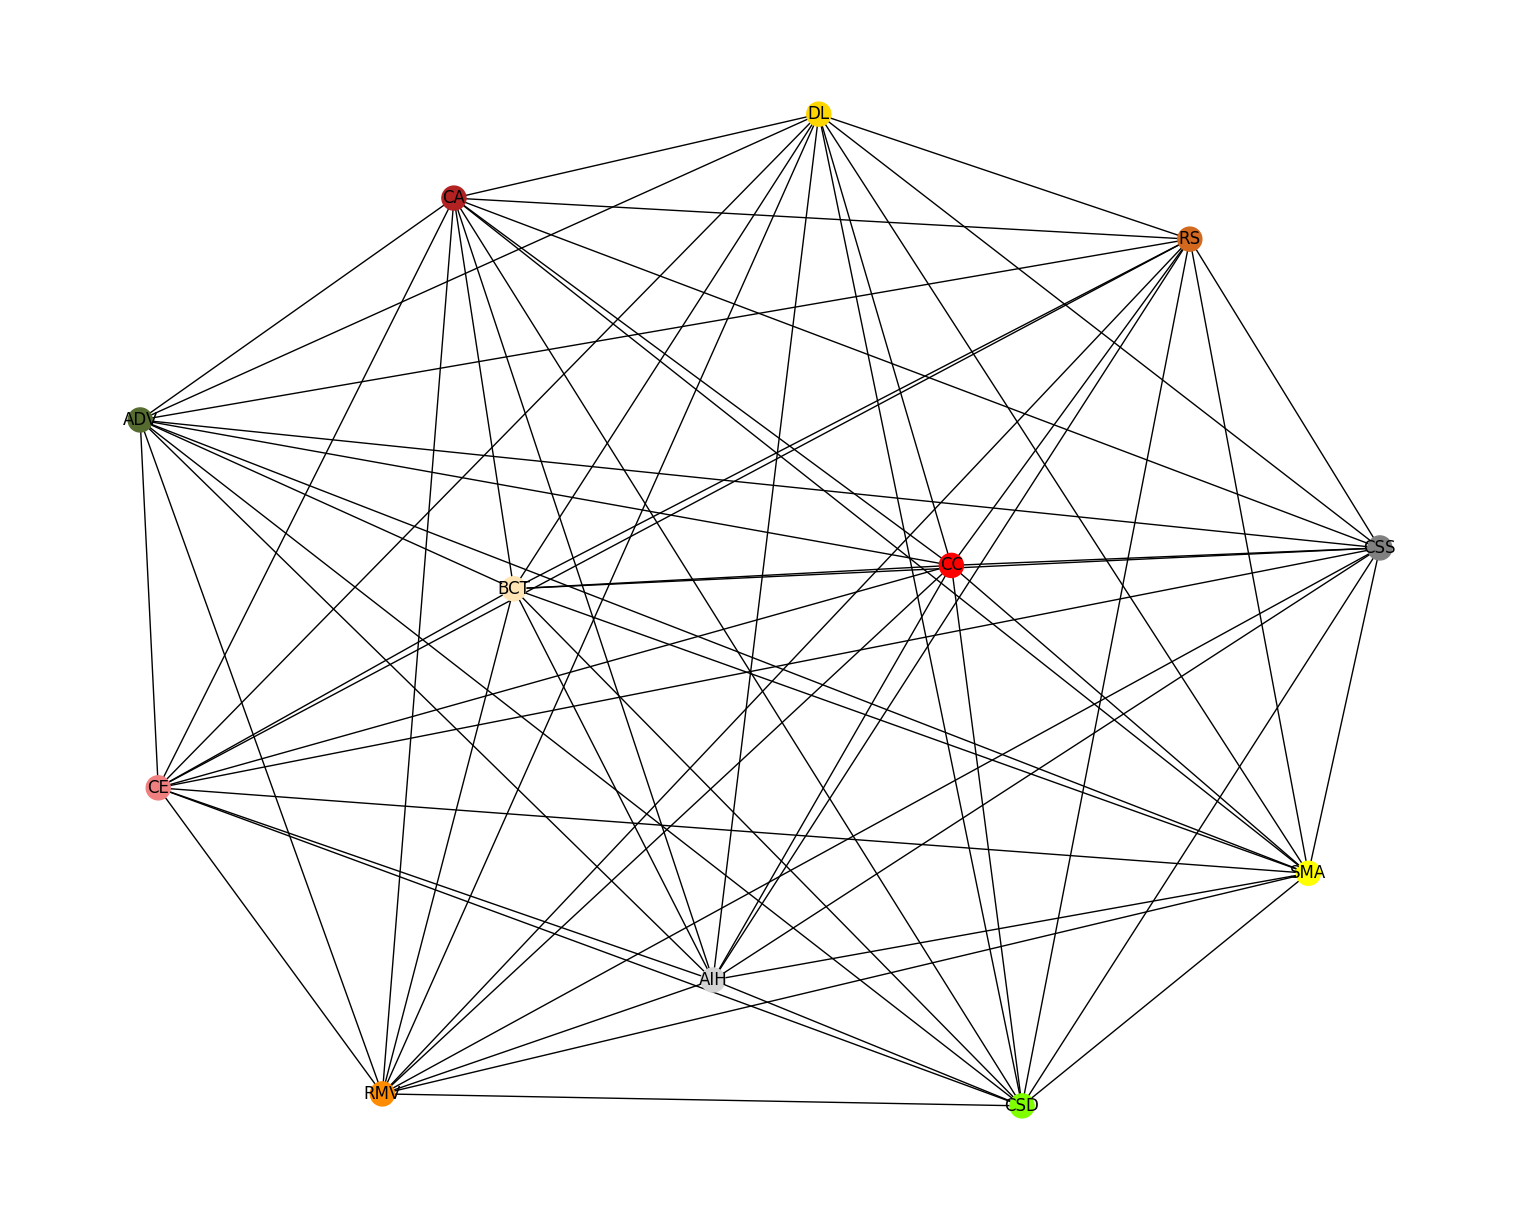

In [ ]:
fig = plt.figure(figsize=(15,12))

colors_nodes = [data['color'] for v, data in class_network.nodes(data=True)]
nx.draw(class_network, node_color=colors_nodes, with_labels=True)

In [ ]:
len(set(colors_nodes))


12

In [ ]:
for v, data in class_network.nodes(data=True):
    calendar[from_color_to_date[data['color']]].append(v)
max_number_exams_sync = len(max(list(calendar.values()),key=len))
rooms = ["Room "+str(i) for i in list(range(max_number_exams_sync))]
df = pd.DataFrame.from_dict(calendar, orient='index', columns=rooms)

In [ ]:
df.head()

,Room 0
2024-05-14 10:00:00,CE
2024-05-14 12:00:00,CSS
2024-05-14 14:00:00,AIH
2024-05-14 16:00:00,CA
2024-05-15 10:00:00,CC


In [ ]:
df.to_csv('timetable.csv')